모듈 호출

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

데이터 불러오기

In [27]:
data = np.load('fruits_300.npy')
data.shape

(300, 100, 100)

데이터 확인

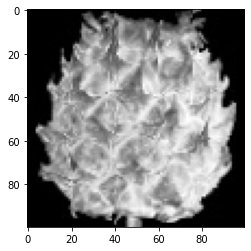

In [28]:
plt.imshow(data[154], cmap = 'gray')

데이터 변형

In [29]:
data2D = data.reshape(-1, 100 * 100)

모델 생성

In [30]:
km=KMeans(n_clusters = 3)

km.fit(data2D)

KMeans(n_clusters=3)

In [31]:
# Cluster 객체 속성 확인
list_labels = np.unique(km.labels_)
print(f'cluster_centers_:   {km.cluster_centers_}')
print(f'labels_ :           {km.labels_}')
print(f'labels unique :     {np.unique(km.labels_)}')

cluster_centers_:   [[1.         1.         1.         ... 1.         1.         1.        ]
 [1.10204082 1.07142857 1.10204082 ... 1.         1.         1.        ]
 [1.01098901 1.01098901 1.01098901 ... 1.         1.         1.        ]]
labels_ :           [2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
labels unique :     [0 1 2]


분류된 이미지들 시각화

In [32]:
def drawImage(arr, ratio = 3):
    # 샘플 개수 설정
    n = len(arr)
    # 한 줄에 10개씩 그린다고 했을 때, 전체 행 개수 계산
    rows = int(np.ceil(n/10))
    # 행이 1개이면 열 개수는 샘플 개수, 그렇지 않으면 10개
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
    figsize =(cols * ratio, rows * ratio))

    for i in range(rows):
        for j in range(cols) :
            if i * 10  + j < n :
                axs[i, j].imshow(arr[i*10 + j], cmap = 'gray')
            axs[i, j].axis('off')
    plt.show()

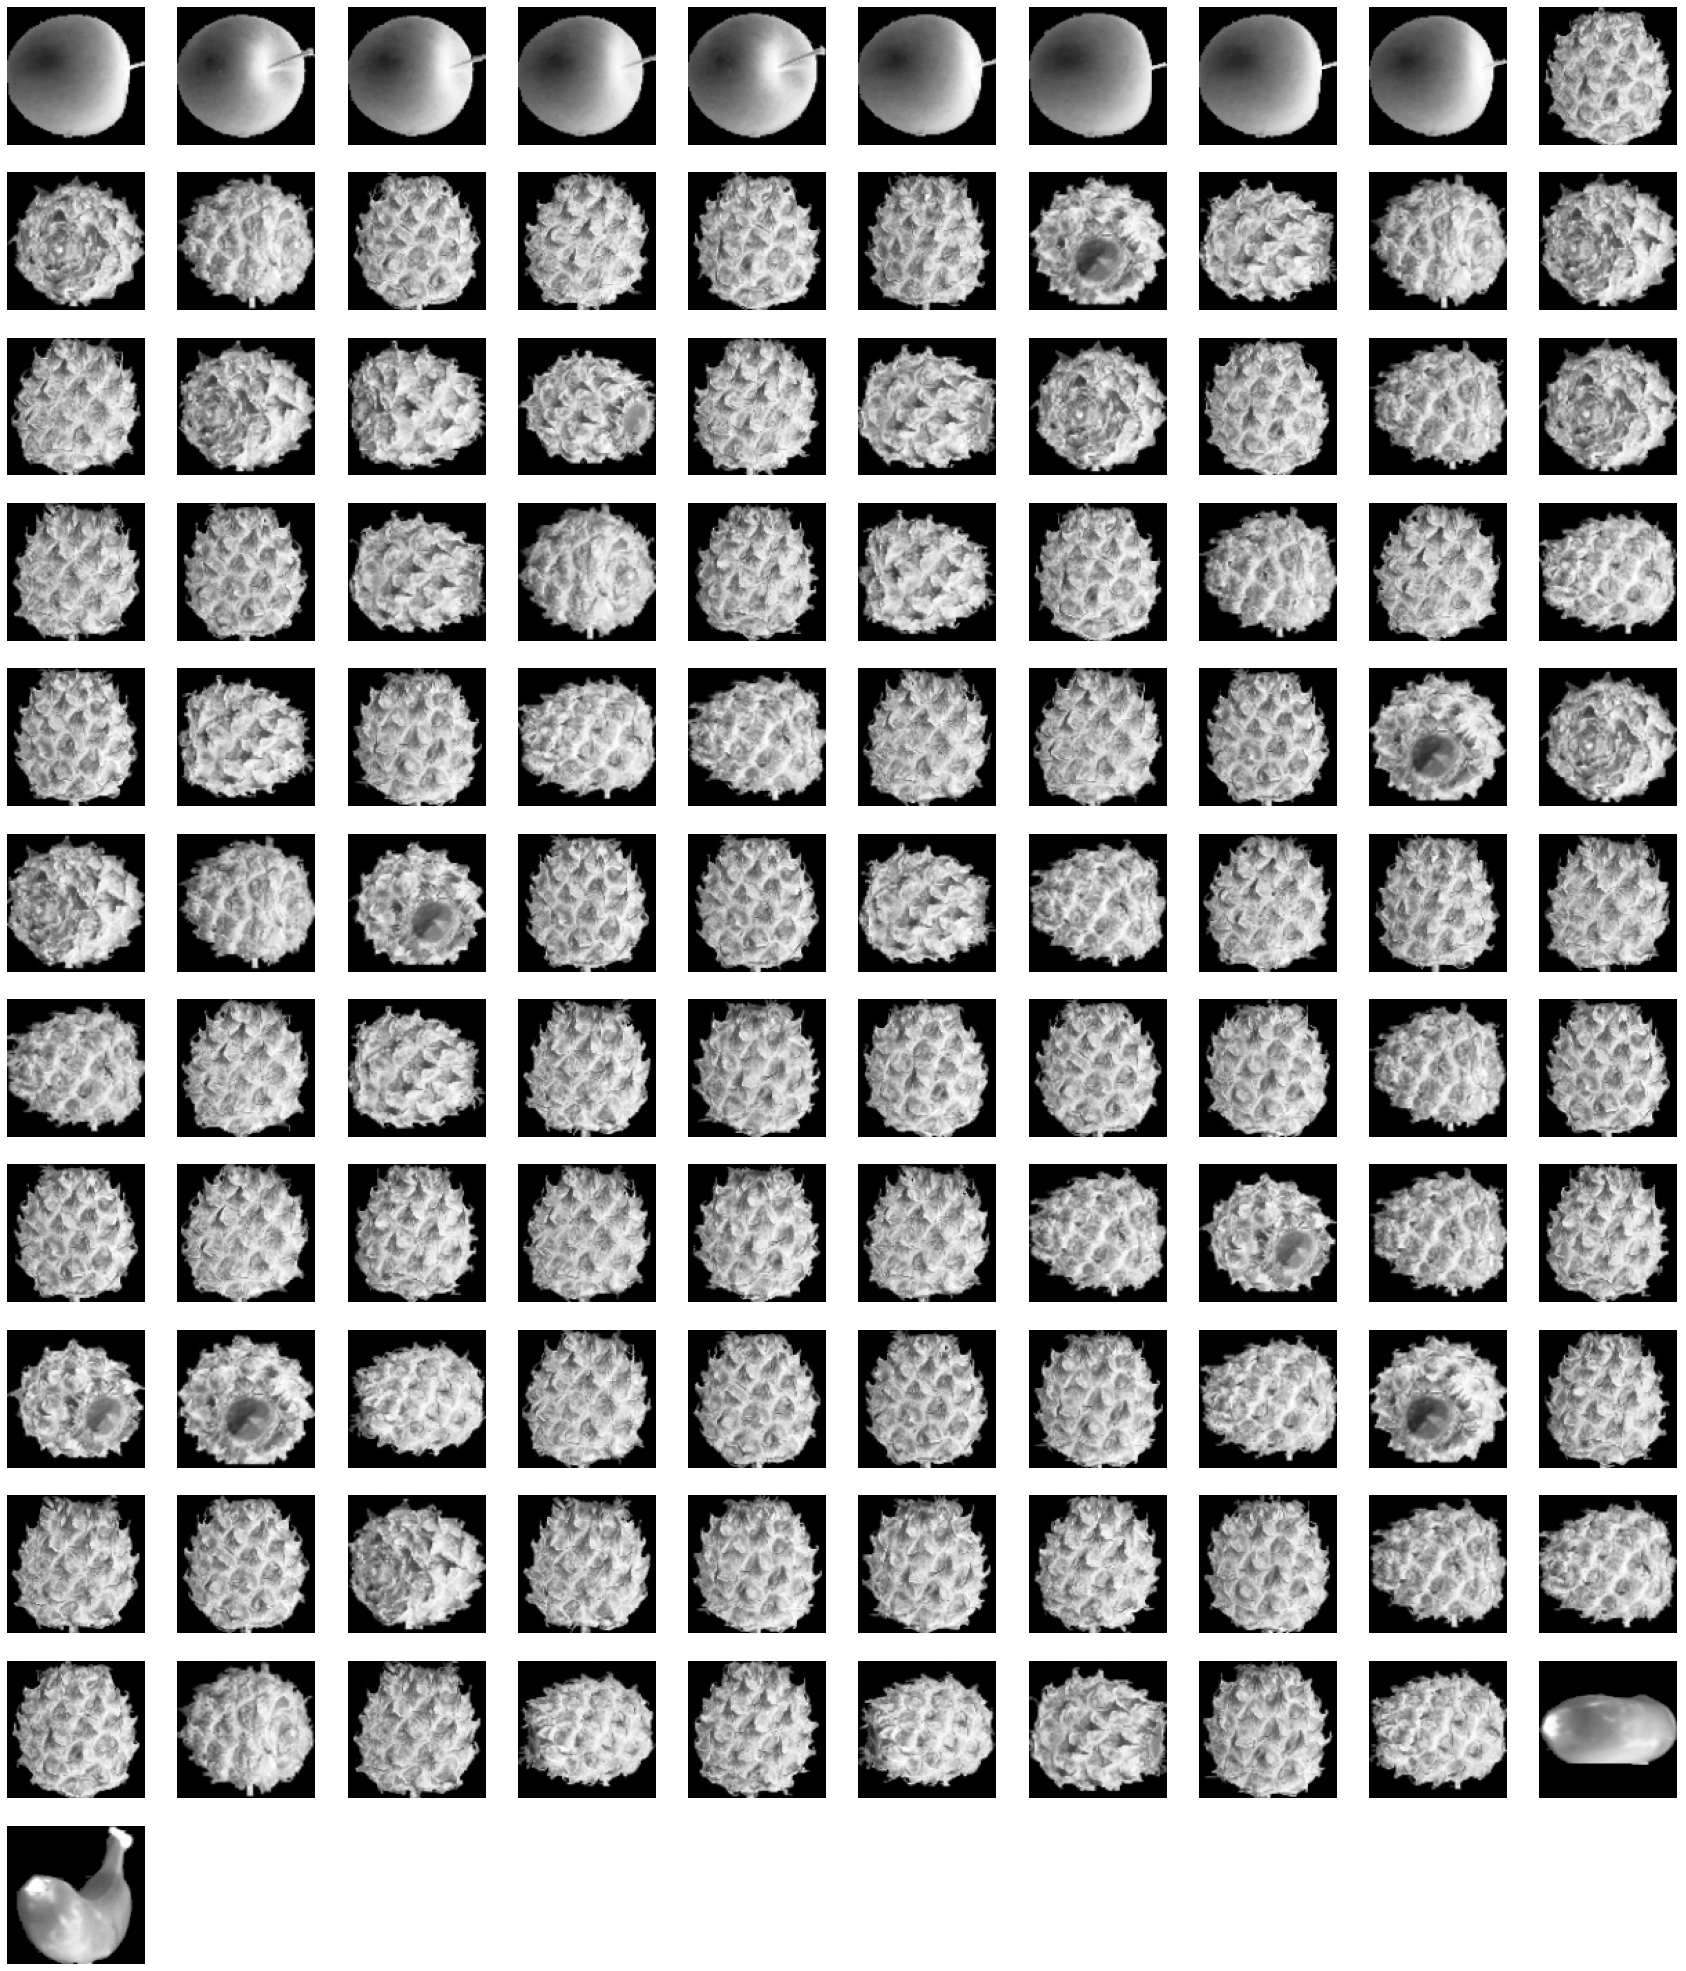

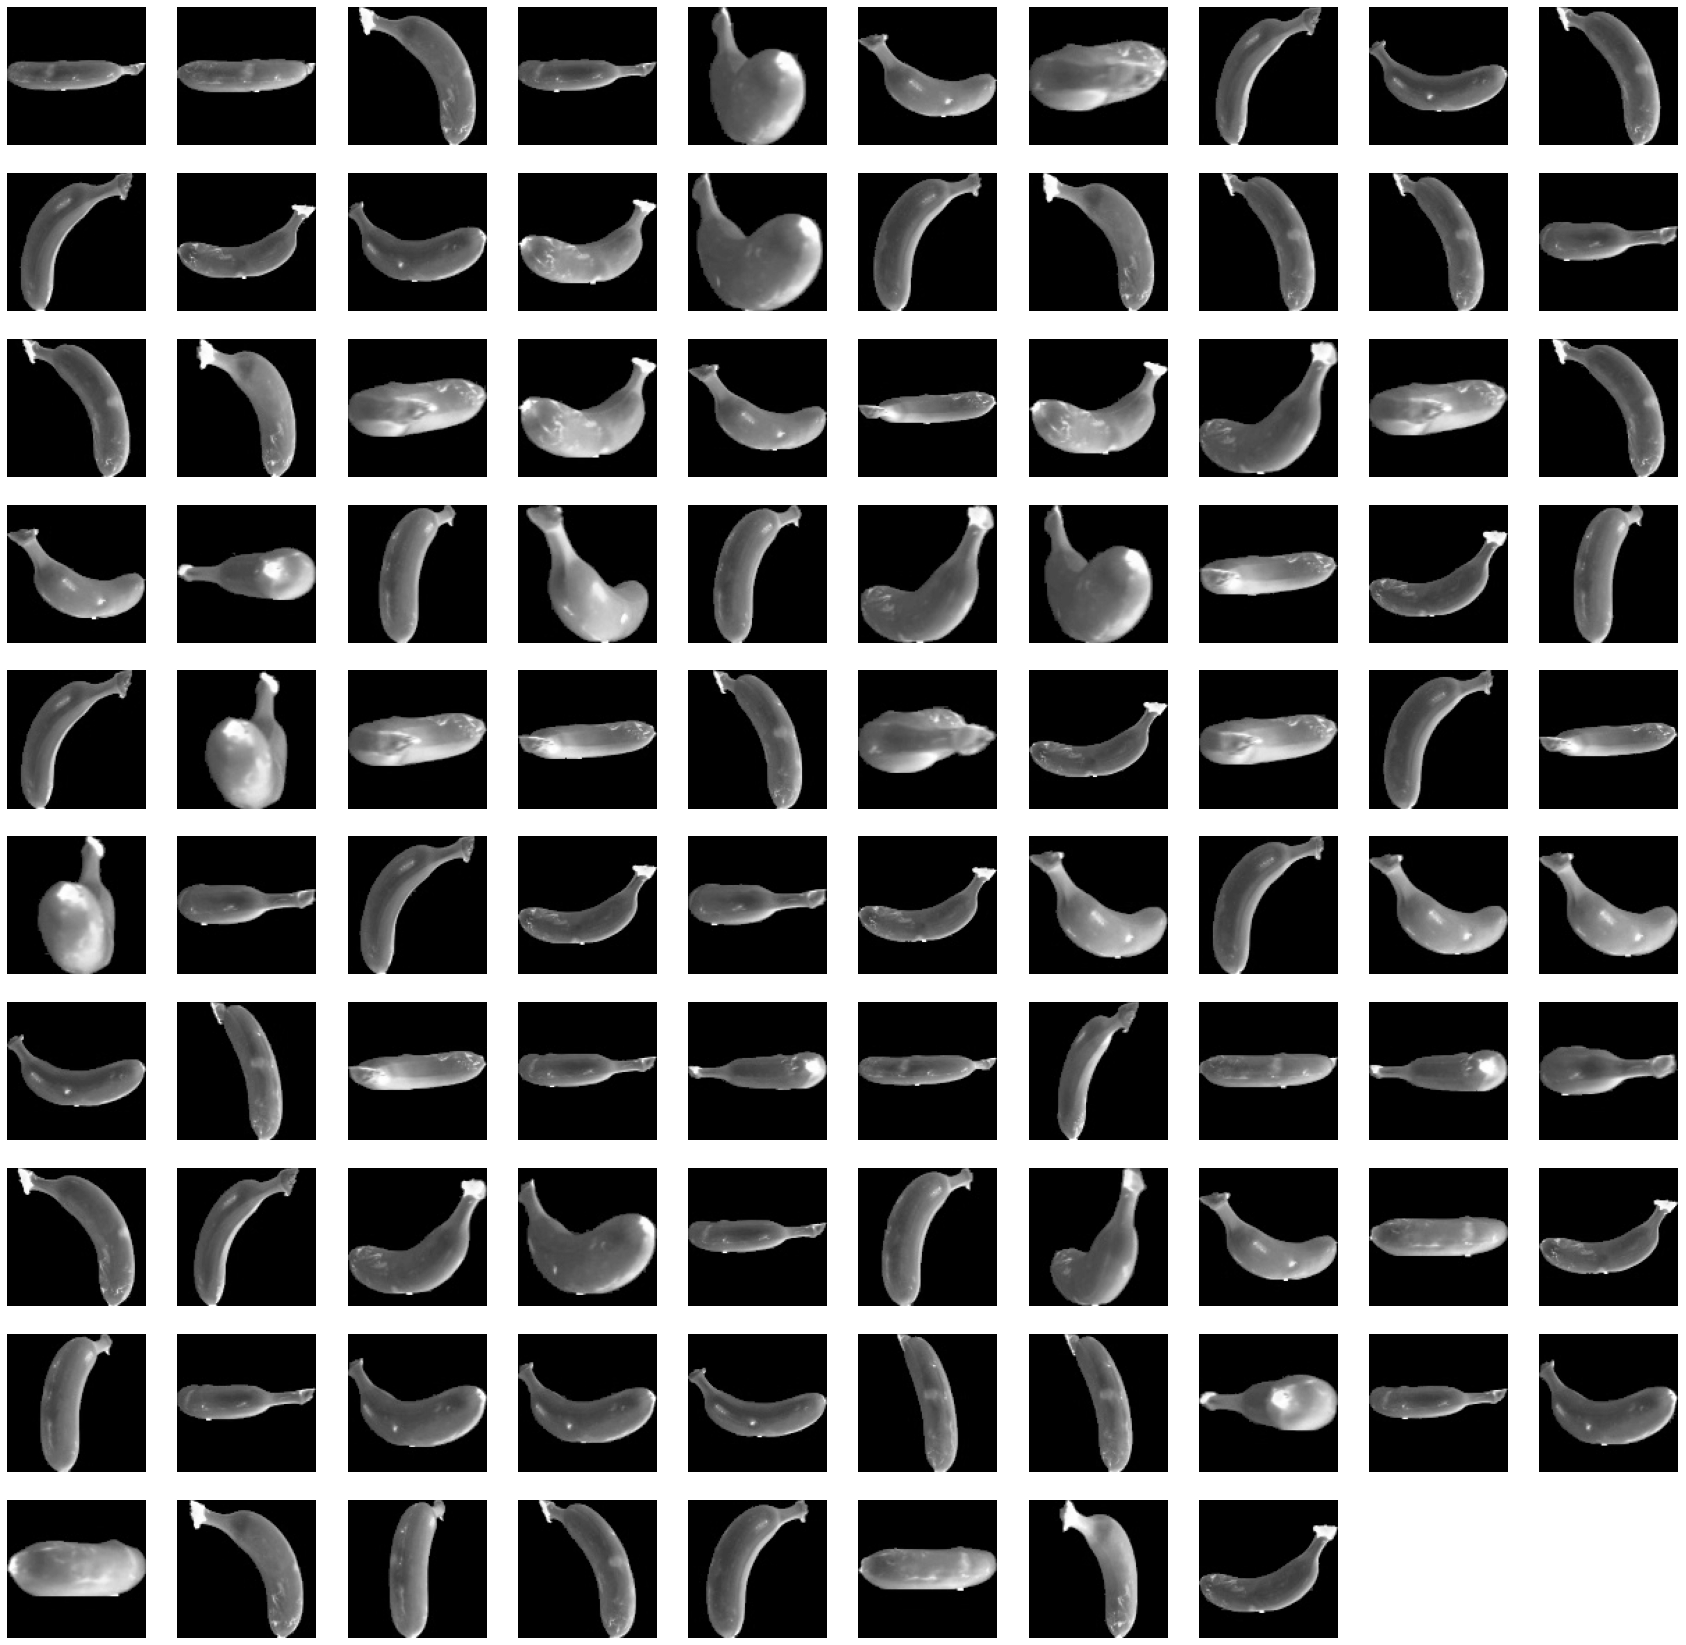

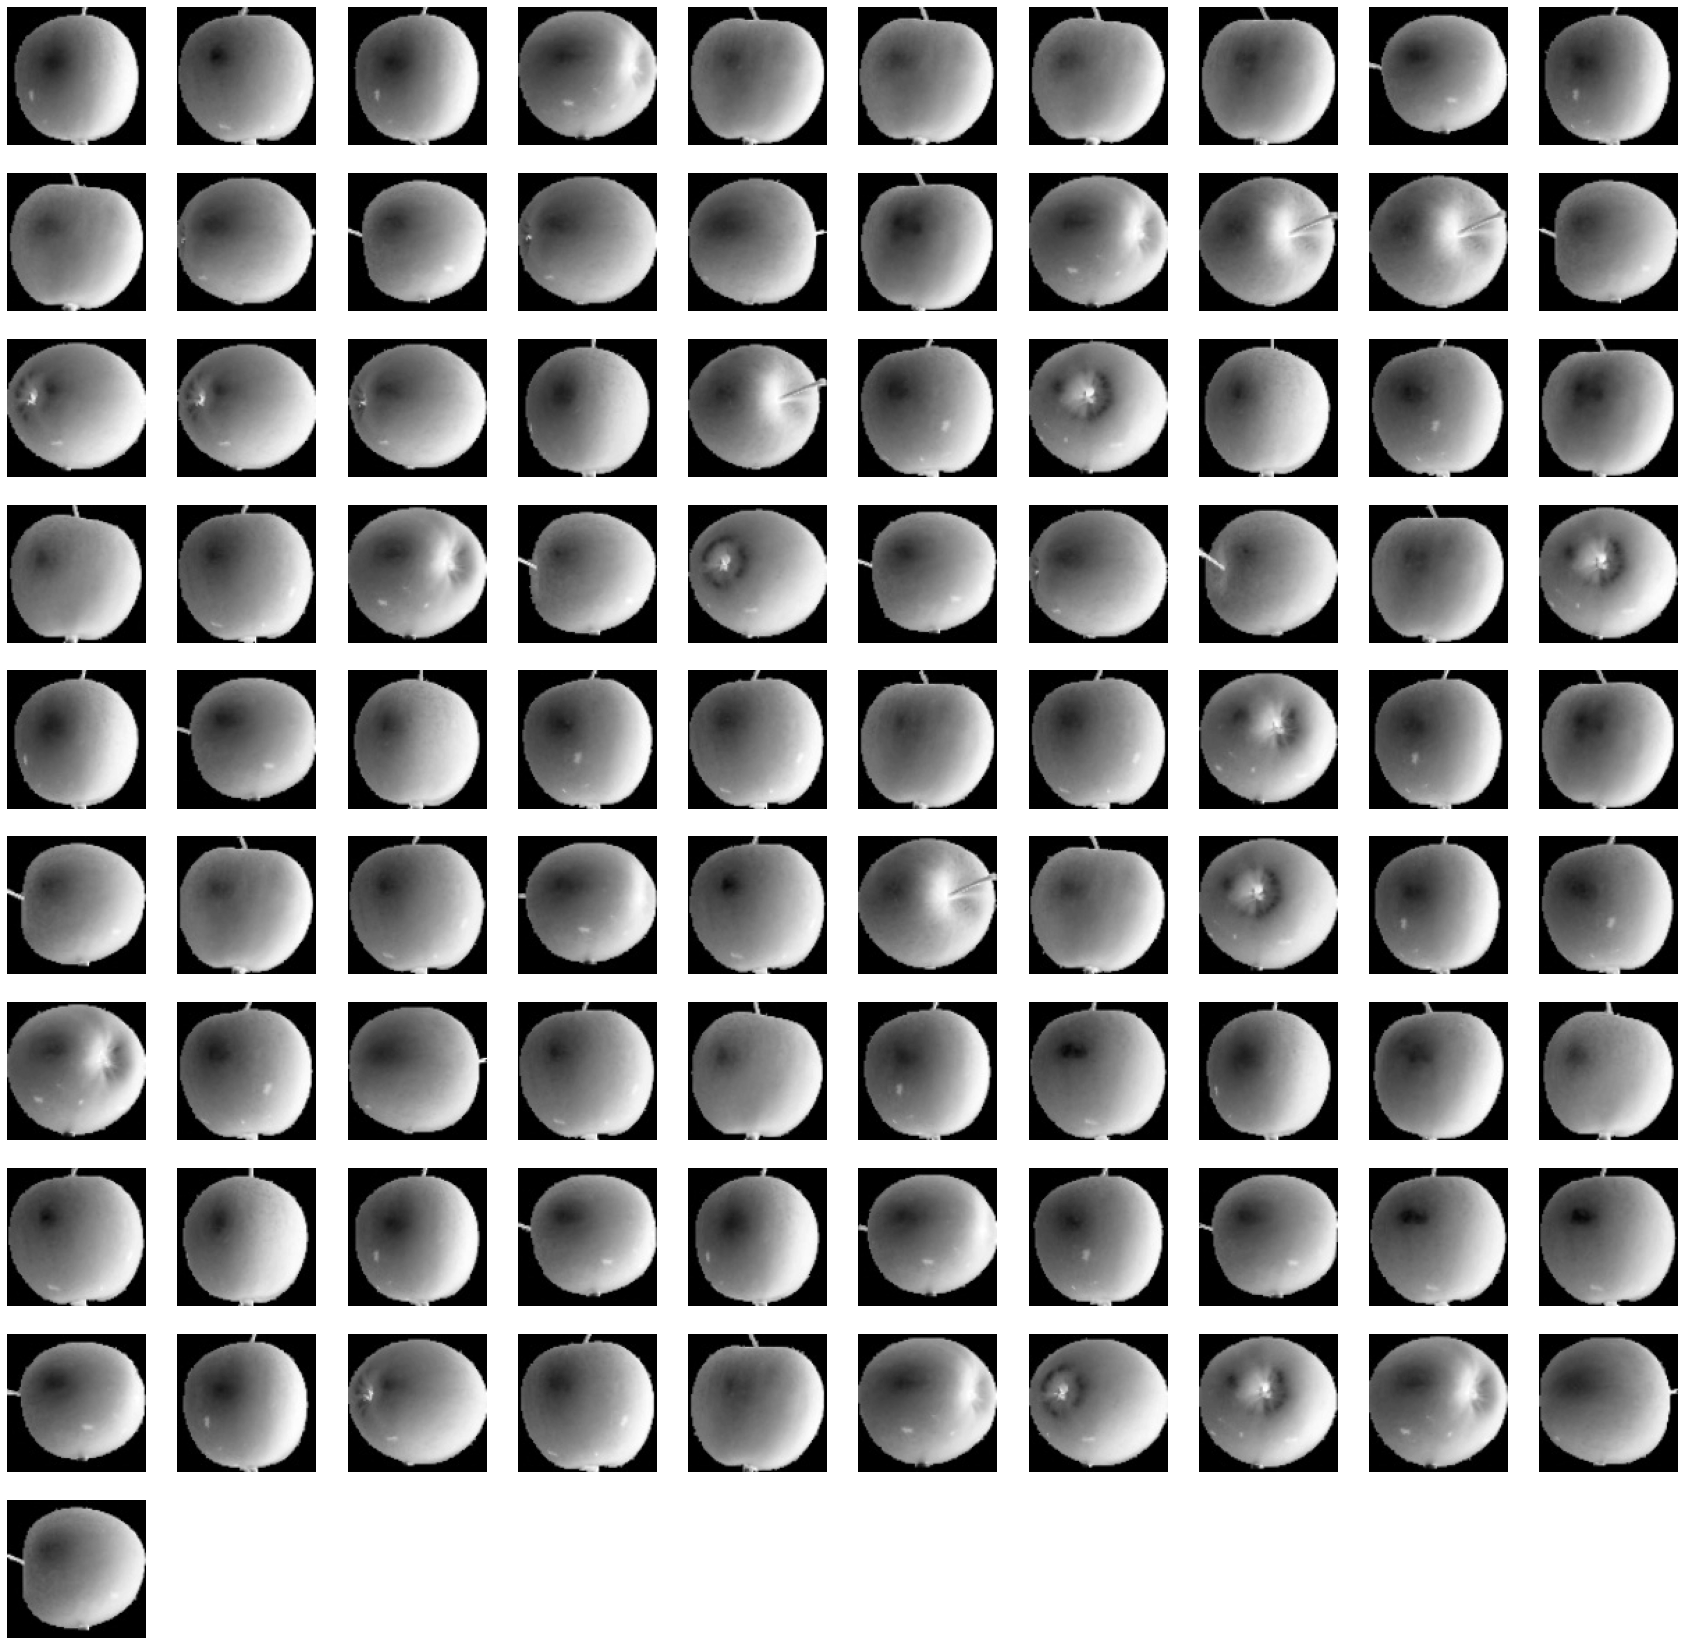

In [33]:
for i in range(0, len(list_labels)):
    drawImage(data[km.labels_==i])

**최적의 클러스트 찾아보기**

In [34]:
# 최적 클러스트 찾는 함수
def checkInertia(num) :
    list_inertia = []
    for i in range(1, num + 1) :
        km = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
        km.fit(data2D)
        list_inertia.append(km.inertia_)

    plt.figure(figsize = (20,16))
    plt.plot(range(1,num+1), list_inertia, marker = 'o')
    plt.show()

c:\Users\LJH\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


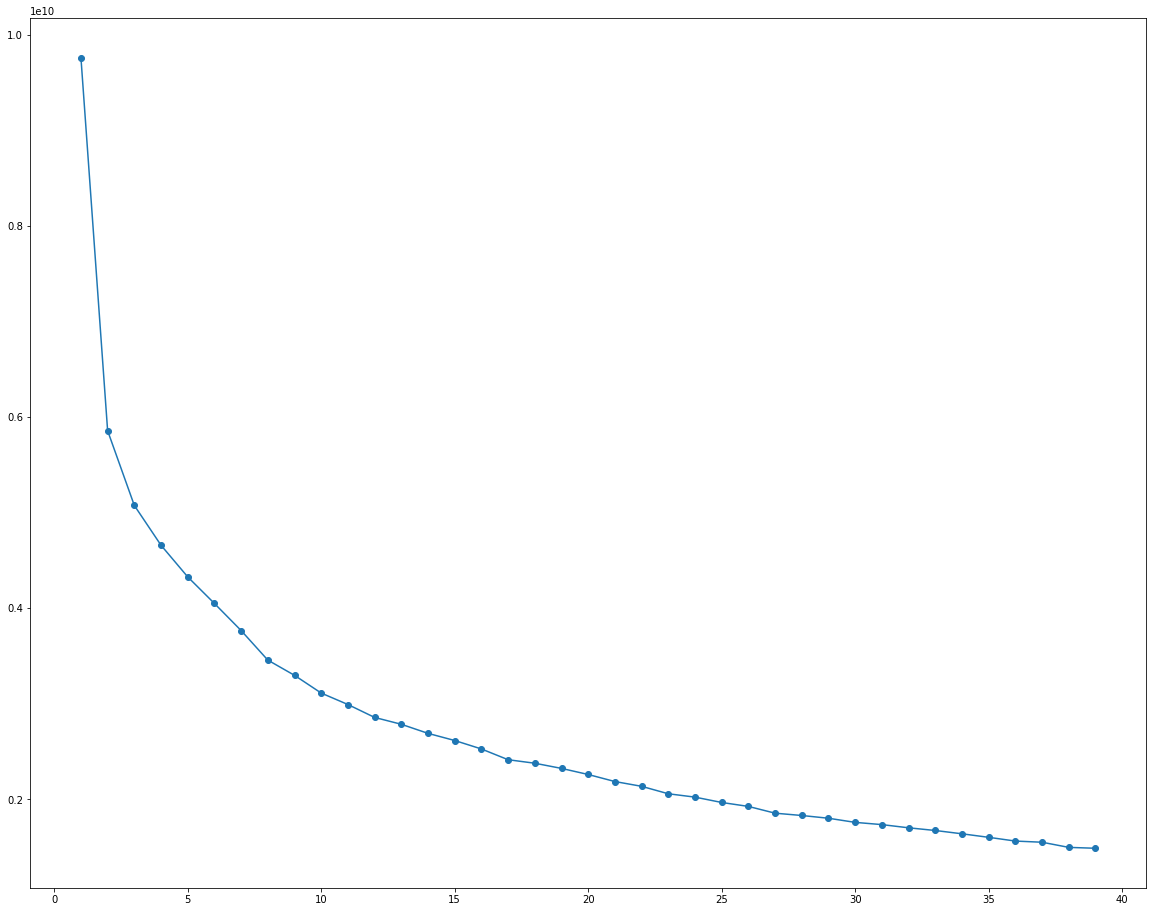

In [35]:
checkInertia(39)

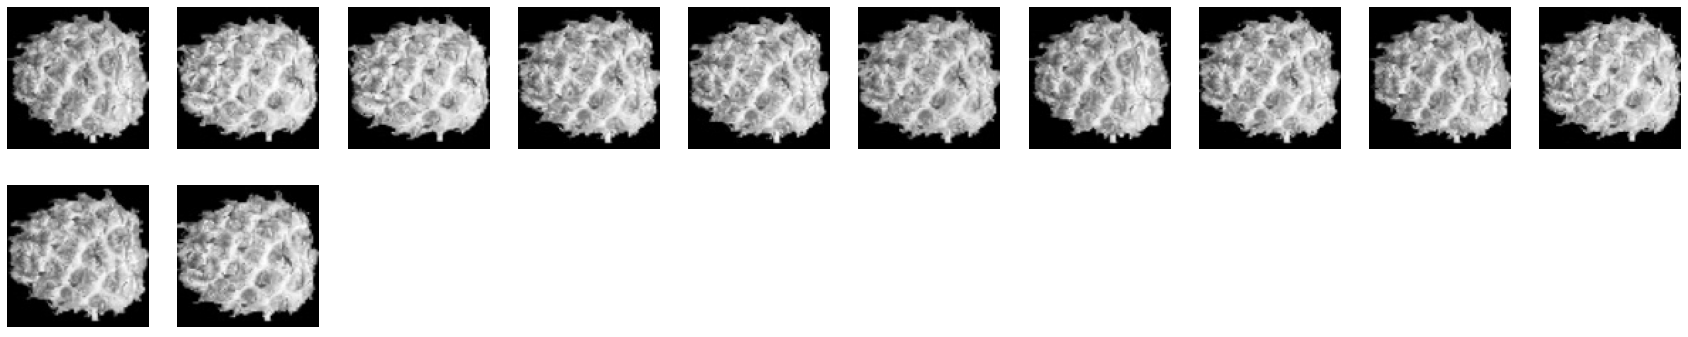

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

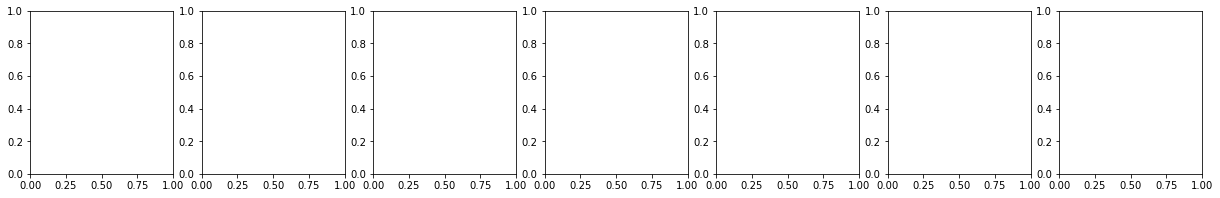

In [36]:
km=KMeans(n_clusters = 30)

km.fit(data2D)

list_labels = np.unique(km.labels_)

for i in range(0, len(list_labels)):
    drawImage(data[km.labels_== i])

In [37]:
list_labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])